In [1]:
import sim_modules as sm
import numpy as np
import matplotlib.pyplot  as plt
import sys 
import input_tmp as input 
import os
import glob
size= input.size
pathin= input.pathin
pathout=input.pathout
cols = 2*size

# for number in range(input.num_participants)[0:2]:
    
#     csvnum = number+1
#     file = path+'%i.csv'%csvnum
#     data = np.loadtxt(file, skiprows=1, usecols=range(0,cols), delimiter=',')
#     matContemp = data[:,size:] #same day (contemporaneous) beta values
#     matLagged = data[:,:size] #lagged beta values
    
#     if input.covContempName=='randn':
#         covContemp = np.random.randn(size,size)
#     else:
#         covContemp = np.ones(size)

#     if input.covLaggedName=='randn':
#         covLagged = np.random.randn(size,size)
#     else:
#         covLagged =np.ones(size)

#     if input.measurecovName=='diag':
#        measureCov= input.ampMeasure*np.eye(size)

    
#     savepath=path+'sims/numParticipants_%s/mask_%s/'%(input.num_participants,str(input.maskZero))
#     try:
#         os.makedirs(savepath)
#     except:
#         print('directory exists')

#     for j in range(input.num_iterations):
#         if input.maskZero:
#             maskContemp =  sm.make_mask(matContemp, contemp=True)
#             maskLagged = sm.make_mask(matLagged, contemp=False)
#         else:
#             maskContemp =  np.ones((input.size, input.size))
#             np.fill_diagonal(maskContemp,0) # still make diagonal zeros
#             maskLagged = np.ones((input.size, input.size))
        
#         samples = sm.generate_timeseries(input.start, input.steps, input.ampContemp, matContemp, covContemp, input.ampLagged, matLagged, covLagged,measureCov)

#         if input.clip_samples:
#         # Checking the clipping
#             samples_clip = sm.clip_timeseries(samples, input.clip_indices, input.clip_mins, input.clip_maxs)
        
#         savefile = savepath+'Series_t%s_covContemp%s_contempAmp%2.2f_covLagged%s_laggedAmp_%2.2f_measureCov%s_measureAmp%2.2f_iter%i.txt'%(input.steps,input.covContempName,input.ampContemp,input.covLaggedName,input.ampLagged,input.measurecovName,input.ampMeasure,j)
#         np.savetxt(savefile,samples, delimiter=',')

In [3]:
dirtest1 = '/Users/reneehlozek/Dropbox/CIFAR_Sims/reGen/A-220429highnoise/sims/numParticipants_100/steps_200/'
dirtest2 = '/Users/reneehlozek/Dropbox/CIFAR_Sims/reGen/B-220429lownoise/sims/numParticipants_100/steps_200/'
dirtest3 = '/Users/reneehlozek/Dropbox/CIFAR_Sims/reGen/C-230222highnoise/sims/numParticipants_100/steps_200/'

savefile1=dirtest1+"Contemp_randn_amp_0.01/Lagged_randn_amp_0.01/Measure_diag_amp_0.1/mask_True/clipsigma_True/rep_0/clip/ind_1.txt"
samples1 = np.loadtxt(savefile1, delimiter=',')
savefile1=dirtest1+"Contemp_randn_amp_0.01/Lagged_randn_amp_0.01/Measure_diag_amp_1.0/mask_True/clipsigma_True/rep_0/clip/ind_1.txt"
samples1_large = np.loadtxt(savefile1, delimiter=',')


savefile2=dirtest2+"Contemp_randn_amp_0.01/Lagged_randn_amp_0.01/Measure_diag_amp_0.1/mask_True/clipsigma_True/rep_0/clip/ind_1.txt"
samples2 = np.loadtxt(savefile2, delimiter=',')
savefile2=dirtest2+"Contemp_randn_amp_0.01/Lagged_randn_amp_0.01/Measure_diag_amp_1.0/mask_True/clipsigma_True/rep_0/clip/ind_1.txt"
samples2_large = np.loadtxt(savefile2, delimiter=',')

savefile3=dirtest3+"Contemp_randn_amp_0.01/Lagged_randn_amp_0.01/Measure_diag_amp_0.1/mask_True/clipsigma_True/rep_0/clip/ind_1.txt"
samples3 = np.loadtxt(savefile3, delimiter=',')
savefile3=dirtest3+"Contemp_randn_amp_0.01/Lagged_randn_amp_0.01/Measure_diag_amp_1.0/mask_True/clipsigma_True/rep_0/clip/ind_1.txt"
samples3_large = np.loadtxt(savefile3, delimiter=',')

In [22]:
# os.chdir('/Users/reneehlozek/Code/CIFAR_Network/GIMME/230328_GIMMEmatrices/')
# files = glob.glob('*.csv')
# nums = [int(file[0:-4])for file in files]
# print(nums)

# # matComptempNoisy = sm.coeff_draw_from_cov(ampContemp,matContemp,covContemp,maskContemp)
# # matLaggedNoisy = sm.coeff_draw_from_cov(ampLagged,matLagged,covLagged,maskLagged)

# samples = sm.generate_timeseries(start, steps, ampContemp, matContemp, covContemp, ampLagged, matLagged, covLagged,measurecov)
# # Checking the clipping
# samples_clip = sm.clip_timeseries(samples, [0,1], [0.2,0], [0.3,1])
# savepath=path+'/sims/Series_t%s_covContemp%s_contempAmp%2.2f_covLagged%s_laggedAmp_%2.2f_measureCov%s_measureAmp%2.2f.txt'%(steps,covContempName,ampContemp,covLaggedName,ampLagged,measurecovName,ampMeasure)
# #print(savepath)
# #np.savetxt(savepath, samples,delimiter=',')
# fig=plt.figure(3, figsize=(10,8))
# fig.patch.set_facecolor('white')

# for i in range(size)[0:2]:
#     plt.plot(samples[:,i], label='v%i'%i)
#     plt.plot(samples_clip[:,i], linestyle='--',label='v%i clip'%i)

# plt.legend(loc='best')

 Measured sig for A-220429highnoise = 0.90, input var = 1.0
 Measured sig for B-220429lownoise = 1.05, input var = 1.0
 Measured sig for C-230222highnoise = 0.85, input var = 1.0
 Measured sig for D-230222lownoise = 1.08, input var = 1.0
 Measured sig for E-230328highnoise = 1.11, input var = 1.0
 Measured sig for F-230328lownoise = 1.17, input var = 1.0


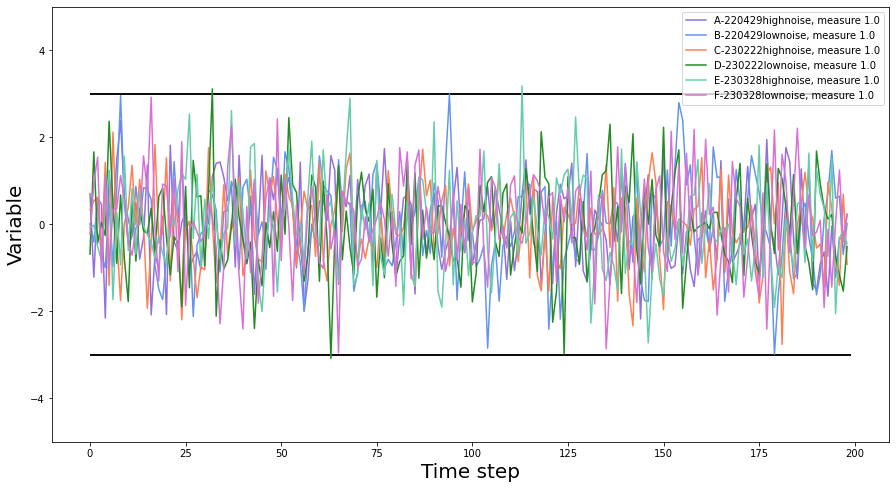

In [85]:
fig=plt.figure(3, figsize=(15,8))
fig.patch.set_facecolor('white')

dirroot = '/Users/reneehlozek/Dropbox/CIFAR_Sims/reGen/'

colors = ['mediumpurple', 'cornflowerblue', 'coral','forestgreen','mediumaquamarine','orchid']
names = ['A-220429highnoise','B-220429lownoise','C-230222highnoise','D-230222lownoise','E-230328highnoise','F-230328lownoise']
amps = [0.1, 0.2, 0.7, 1.0] 
lines = ['-','-.',':','-']
nameinds = [0,1,2,3,4,5]
ampinds = [3]
paramind=1
for nameind in nameinds:
    for ampind in ampinds:
        root_amp = "Contemp_randn_amp_0.01/Lagged_randn_amp_0.01/Measure_diag_amp_"+str(amps[ampind])+"/mask_True/clipsigma_True/rep_0/clip/"
        dir = dirroot+names[nameind] + '/sims/numParticipants_100/steps_200/' + root_amp
        samples = np.loadtxt(dir+'ind_1.txt', delimiter=',')
        plt.plot(samples[:,0], color=colors[nameind], linestyle=lines[ampind],label='%s, measure %2.1f'%(names[nameind], amps[ampind]))
        print(f" Measured sig for {names[nameind]} = {np.var(samples[:,0]):2.2f}, input var = {amps[ampind]}")
        plt.hlines(np.sqrt(amps[ampind])*3, 0, len(samples1), color='k', alpha=0.5)
        plt.hlines(np.sqrt(amps[ampind])*-3,  0, len(samples2),color='k', alpha=0.5)
    
plt.ylim([-5,5])

plt.xlabel('Time step', fontsize=20)
plt.ylabel('Variable', fontsize=20)
plt.legend(loc='best')
#plt.savefig('samples_amplitude%2.2f_lagamp%2.2f.png'%(input.ampMeasure, input.ampLagged))
plt.savefig('clipping_vars.png')

Using value multiplied = 30.0


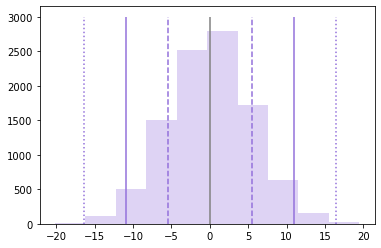

In [78]:
vars = [30.0] #, 0.7, 1.0] # this is the VARIANCE we expect
size=1
nsamp = 10000
use_std = False
samples = np.zeros(nsamp)

for ivar,var in enumerate(vars):
    print(f'Using value multiplied = {var}')
    
    for samp in range(nsamp):
        if use_std:
            measureCov= np.sqrt(var)*np.eye(size)
        else:
            measureCov= var*np.eye(size)

        samples[samp] = np.random.multivariate_normal(np.zeros(size),measureCov)
    plt.hist(samples, alpha=0.3, color=colors[ivar])
    plt.vlines(0*np.sqrt(var),0,30*np.sqrt(nsamp),color='gray')
    plt.vlines(2*np.sqrt(var),0,30*np.sqrt(nsamp),color=colors[ivar])
    plt.vlines(-2*np.sqrt(var),0,30*np.sqrt(nsamp),color=colors[ivar])
    plt.vlines(3*np.sqrt(var),0,30*np.sqrt(nsamp),color=colors[ivar],ls=':')
    plt.vlines(-3*np.sqrt(var),0,30*np.sqrt(nsamp),color=colors[ivar],ls=':')
    plt.vlines(np.sqrt(var),0,30*np.sqrt(nsamp),color=colors[ivar], ls='--')
    plt.vlines(-np.sqrt(var),0,30*np.sqrt(nsamp),color=colors[ivar],ls='--')

/Users/reneehlozek/Dropbox/CIFAR_Sims/reGen/A-220429highnoise/sims/numParticipants_100/steps_200/Contemp_randn_amp_0.01/Lagged_randn_amp_0.01/Measure_diag_amp_1.0/mask_True/clipsigma_True/rep_0/clip/ind_1.txt
param 3 [] [] post 3.0
param 3 [3.49333707] [54] pre 3.0
 Measured sig for A-220429highnoise = 0.988, input var = 1.0
 Measured sig for A-220429highnoise = 0.988, input var = 1.0


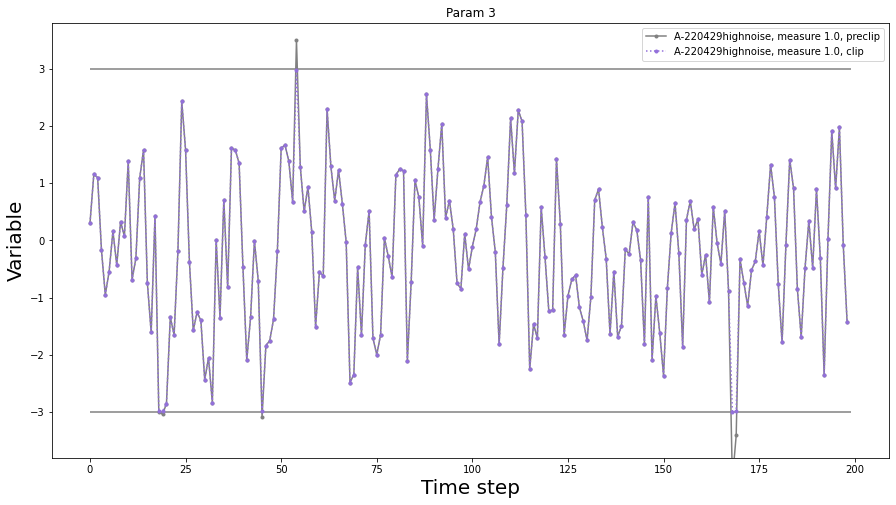

In [196]:


dirroot = '/Users/reneehlozek/Dropbox/CIFAR_Sims/reGen/'

colors = ['mediumpurple', 'cornflowerblue', 'coral','forestgreen','mediumaquamarine','orchid']
names = ['A-220429highnoise','B-220429lownoise','C-230222highnoise','D-230222lownoise','E-230328highnoise','F-230328lownoise']
amps = [0.1, 0.2, 0.7, 1.0] 
lines = [':',':',':',':']
nameinds = [0]
ampinds = [3]
paramind=[3]

for param in paramind:
    fig=plt.figure(param, figsize=(15,8))
    fig.patch.set_facecolor('white')
    for nameind in nameinds:
        for ampind in ampinds:
            root_amp = "Contemp_randn_amp_0.01/Lagged_randn_amp_0.01/Measure_diag_amp_"+str(amps[ampind])+"/mask_True/clipsigma_True/rep_0/clip/"
            dir = dirroot+names[nameind] + '/sims/numParticipants_100/steps_200/' + root_amp
            print(dir+'ind_1.txt')
            samples =  np.loadtxt(dir+'ind_1.txt', delimiter=',')
            inds_post = np.where(samples[:,param]>np.sqrt(amps[ampind])*3)[0]
            print('param', param, samples[inds_post,param], inds_post,'post',np.sqrt(amps[ampind])*3)
            root_amp = "Contemp_randn_amp_0.01/Lagged_randn_amp_0.01/Measure_diag_amp_"+str(amps[ampind])+"/mask_True/clipsigma_True/rep_0/preclip/"
            dir = dirroot+names[nameind] + '/sims/numParticipants_100/steps_200/' + root_amp
            samples_preclip =  np.loadtxt(dir+'ind_1_preclip.txt', delimiter=',')
            inds_pre = np.where(samples_preclip[:,param]>np.sqrt(amps[ampind])*3)[0]
            print('param', param,samples_preclip[inds_pre,param], inds_pre,'pre',np.sqrt(amps[ampind])*3)
            plt.plot(samples_preclip[:,param], color='gray', marker='.',linestyle='-',label='%s, measure %2.1f, preclip'%(names[nameind], amps[ampind]))
            plt.plot(samples[:,param], color=colors[nameind], marker='.',linestyle=lines[ampind],label='%s, measure %2.1f, clip'%(names[nameind], amps[ampind]))
            print(f" Measured sig for {names[nameind]} = {np.var(samples[:,0]):2.3f}, input var = {amps[ampind]}")
            print(f" Measured sig for {names[nameind]} = {np.var(samples_preclip[:,0]):2.3f}, input var = {amps[ampind]}")
            plt.hlines(np.sqrt(amps[ampind])*3, 0, len(samples1), color='k', alpha=0.5)
            plt.hlines(np.sqrt(amps[ampind])*-3,  0, len(samples2),color='k', alpha=0.5)
        
    plt.ylim([-3.8,3.8])

    plt.xlabel('Time step', fontsize=20)
    plt.ylabel('Variable', fontsize=20)
    plt.legend(loc='best')
    plt.title('Param %i'%param)
#plt.savefig('samples_amplitude%2.2f_lagamp%2.2f.png'%(input.ampMeasure, input.ampLagged))
    plt.savefig('clipping_var_%i.png'%param)

0.31622776601683794

In [161]:
-3*(1-0.05*np.random.rand(20))

array([-2.88591515, -2.88774807, -2.91828985, -2.98420318, -2.85463491,
       -2.96020178, -2.92957584, -2.96610403, -2.94219954, -2.9972813 ,
       -2.86894738, -2.93214144, -2.96015259, -2.94111951, -2.98678462,
       -2.87271523, -2.86768093, -2.87126621, -2.92899252, -2.89991896])